In [1]:
import pandas as pd
import numpy as np 
import os 
import sys

In [2]:
data=pd.read_csv("credit.csv")

In [3]:
data.shape

(30000, 25)

In [4]:
data.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x=data.iloc[:,:-1]

In [7]:
y=data[['default.payment.next.month']]

In [8]:
y.shape

(30000, 1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [10]:
from sklearn.tree import DecisionTreeClassifier  
classifier = DecisionTreeClassifier()  
classifier.fit(X_train, y_train)  

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [11]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

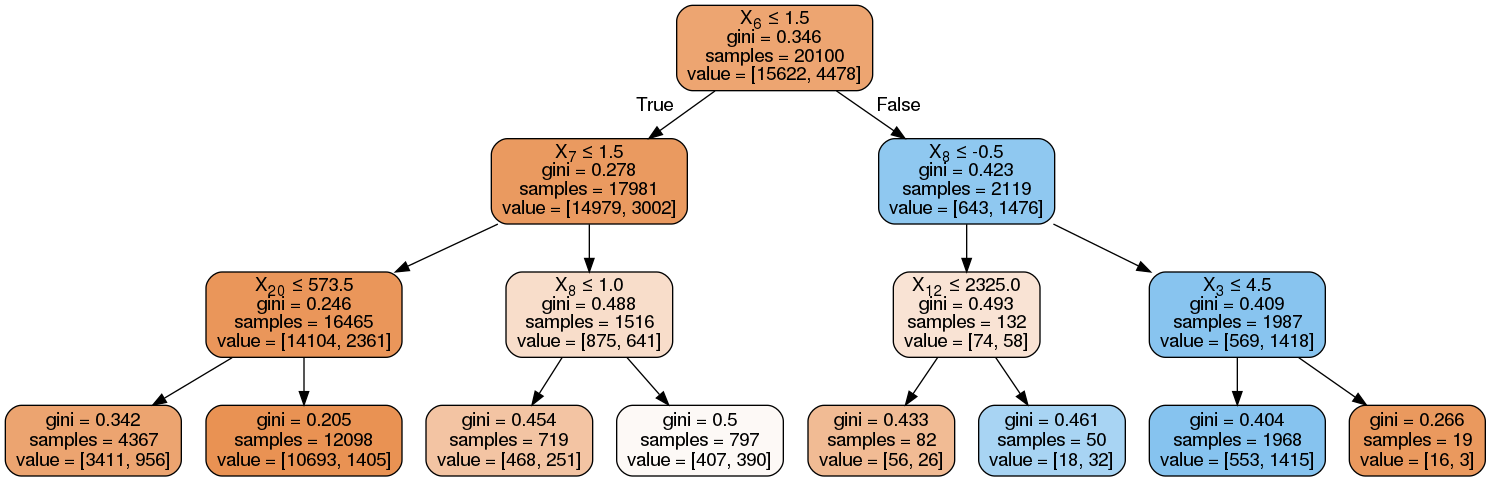

In [12]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf_gini, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [13]:
y_pred=clf_gini.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix

In [15]:
confusion_matrix(y_test,y_pred)

array([[7458,  284],
       [1476,  682]])

In [16]:
 from sklearn.metrics import accuracy_score

In [17]:

accuracy_score(y_test,y_pred)

0.8222222222222222

In [18]:
 from sklearn.metrics import precision_score

In [19]:
precision_score(y_test, y_pred, average='macro')  

0.7703962947049933

In [20]:
 from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average='micro')  

0.8222222222222222

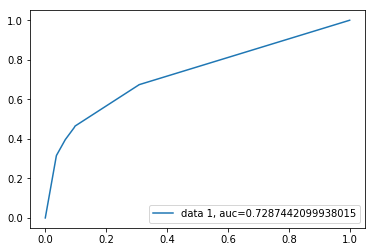

In [24]:
from sklearn import metrics 
y_pred_proba = clf_gini.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [30]:
from sklearn.metrics import classification_report
target_names = ['non-default', 'default']

In [34]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

 non-default       0.83      0.96      0.89      7742
     default       0.71      0.32      0.44      2158

   micro avg       0.82      0.82      0.82      9900
   macro avg       0.77      0.64      0.67      9900
weighted avg       0.81      0.82      0.79      9900



In [41]:
from sklearn.metrics import f1_score

In [42]:
print(f1_score(y_test, y_pred, average='macro')  )

0.665539410606117
